## Clusturing

In [2]:
import pandas as pd


In [9]:
df= pd.read_csv('Top_mentor_projects_Datasets-main/Mall_Customers_Survey.csv')
df.head(20)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
### create X
x = df[['Annual Income (k$)','Spending Score (1-100)' ]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


clustering technique called as K-means

In [19]:
from sklearn.cluster import KMeans

In [49]:
k = KMeans(n_clusters = 5)   ##we choose the manual cluster by default it is 5 also

In [50]:
km = k.fit(x)  ## fit the model

In [51]:
km.inertia_ ## centroids of the clusters

44448.45544793369

In [52]:
km.cluster_centers_ ## it is basically the variance  of all clusters

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [53]:
km.pred = k.fit_predict(x) ##it choose the k from the 1 to 5 (0 to 4 )
km.pred

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

HOW TO CHOOSE THE NUMBER OF CLUSTERS?

In [58]:
## within-cluster-sum-ofsquares (this is method to find best clusters(groups))

wcss = []   ##make a empty list
for i in range(1,11):  ## we can give minimum to maximum clusters( group) we want
    kmeans = KMeans(n_clusters = i,random_state=42) ### we define a model which we import from sklearn.here n_cluster is define and random_state is we can give any rows id from table 
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Ashwin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
wcss
## here this is inertia of n_cluster 
##here first row show the inertia when cluster is 1 ,second row show that inertia when clusture is 2

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432]

In [61]:
## now we plot that wcss to choose the best cluster

In [65]:
import matplotlib.pyplot as plt ##import the library

Text(0.5, 0, 'no of cluster')

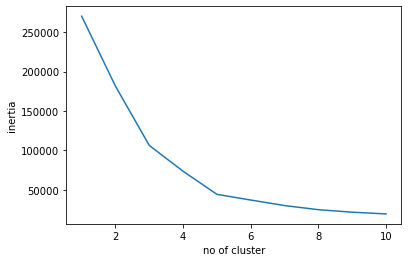

In [73]:
plt.plot(range(1,11),wcss)
plt.ylabel('inertia')
plt.xlabel('no of cluster')
##plotting the graph

in above we see the elbow method the change or bend in cluster of 3 and 5 

in after 5 it not bend the cluser to choose 5 is best for it we can also choose 3 or 5 in between


# now we create the group

In [84]:
## create the dataframe that show the cluster or groups
df1 = pd.DataFrame({
    'CustomerID':df['CustomerID'],
    
    'Annual Income':df['Annual Income (k$)'],
    'Spending Score':df['Spending Score (1-100)'],
    'clusters':km.pred
    
})
df1.head(10)
##here we created a new dataframe

,CustomerID,Annual Income,Spending Score,clusters
0,1,15,39,1
1,2,15,81,4
2,3,16,6,1
3,4,16,77,4
4,5,17,40,1
5,6,17,76,4
6,7,18,6,1
7,8,18,94,4
8,9,19,3,1
9,10,19,72,4


In [85]:
## plot the scatter plot

<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

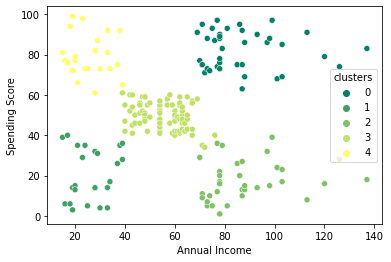

In [93]:
import seaborn as sns
sns.scatterplot(x='Annual Income',y='Spending Score',data=df1,hue='clusters',palette='summer') ## pallete give colurs 
##here we change a color by group

In [ ]:
## after annalysing that it show spending score and annual income is low has not good customers

you can watch video to get what analyse in that 56.00 min and create new columns

In [94]:
##here we created the score columns based on the spending score
def flag(df):
    if (df['Spending Score (1-100)'] < 31):
        return 'low profile customer'
    elif (df['Spending Score (1-100)'] < 51):
        return 'medium profile customer'
    elif(df['Spending Score (1-100)'] < 81):
        return 'high profile customer'
    else:
        return 'excellent Customer'
    

In [113]:
df['flag'] = df.apply(flag,axis=1)
### here we created the new flag columns and map that
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),flag
0,1,Male,19,15,39,medium profile customer
1,2,Male,21,15,81,excellent Customer
2,3,Female,20,16,6,low profile customer
3,4,Female,23,16,77,high profile customer
4,5,Female,31,17,40,medium profile customer
...,...,...,...,...,...,...
195,196,Female,35,120,79,high profile customer
196,197,Female,45,126,28,low profile customer
197,198,Male,32,126,74,high profile customer
198,199,Male,32,137,18,low profile customer


In [114]:
cluster = pd.Series(km.pred)
cluster

0      1
1      4
2      1
3      4
4      1
      ..
195    0
196    2
197    0
198    2
199    0
Length: 200, dtype: int32

In [108]:
df2 = pd.concat([df,cluster],axis = 1)
df2 ##we created new flag 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),glag,flag,0
0,1,Male,19,15,39,medium profile customer,medium profile customer,1
1,2,Male,21,15,81,excellent Customer,excellent Customer,4
2,3,Female,20,16,6,low profile customer,low profile customer,1
3,4,Female,23,16,77,high profile customer,high profile customer,4
4,5,Female,31,17,40,medium profile customer,medium profile customer,1
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,high profile customer,high profile customer,0
196,197,Female,45,126,28,low profile customer,low profile customer,2
197,198,Male,32,126,74,high profile customer,high profile customer,0
198,199,Male,32,137,18,low profile customer,low profile customer,2


In [122]:
df2.rename(columns = {'flag':'customer_profile',0:'cluster'},inplace = True)
df2 = df2.drop('glag',1)
df2.head(5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),customer_profile,cluster
0,1,Male,19,15,39,medium profile customer,1
1,2,Male,21,15,81,excellent Customer,4
2,3,Female,20,16,6,low profile customer,1
3,4,Female,23,16,77,high profile customer,4
4,5,Female,31,17,40,medium profile customer,1


In [124]:
## import the dataset
df2.to_csv('E:/cluster_prediction.csv')
## show the data to the for visualization

# hierarchial clustering

In [125]:
import scipy.cluster.hierarchy as sch

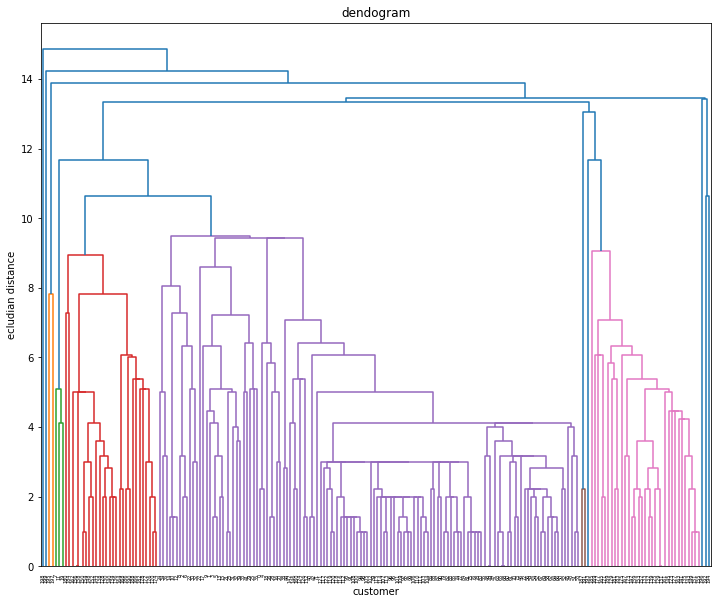

In [126]:
plt.figure(figsize = (12,10))
dendogram = sch.dendrogram(sch.linkage(x,method='single'))
plt.title('dendogram')
plt.xlabel('customer')
plt.ylabel('ecludian distance')
plt.show()

In [127]:
from sklearn.cluster import AgglomerativeClustering


In [130]:
hc = AgglomerativeClustering(n_clusters = 5)
y_hc = hc.fit_predict(x)

In [131]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [6]:
##keep learning this